# Customer Churn Analysis


---


## Context

 The leading telecom company has a massive market share but one big problem: several rivals that are constantly trying to  steal customers. Because this company has been the market leader for so many years, there are not significant opportunities to grow with new customers. Instead, company executives have decided to focus on their churn: the rate at which they lose customers.

They have two teams especially interested in this data: the marketing team and the customer service team.  Each team has its own reason for wanting the analysis. The marketing team wants to find out who the most likely people to churn are and create content that suits their interests.  The customer service team would like to proactively reach out to customers who are about to churn, and try to encourage them to stay.

They decide to hire you for two tasks:
1.	Help them identify the types of customers who churn
2.	Predict who of their current customers will churn next month.

To do this, they offer you a file of <a href='https://www.kaggle.com/blastchar/telco-customer-churn/data#'> 7,000 customers <a>. Each row is a customer.  The Churn column will say Yes if the customer churned in the past month. The data also offers demographic data and data on the services that each customer purchases. Finally there is information on the payments those customers make.

Deliverables - What is expected Week 1
A presentation explaining churn for the marketing team - any format. Tell a story to the marketing team to help them understand the customers who churn and what the marketing team can do to prevent it.  Highlight the information with helpful visualizations.
1.	How much is churn affecting the business? How big is churn compared to the existing customer base?
2.	Explain churn by the below categories. Are there any factors that combine to be especially impactful?
    *	Customer demographics like age and gender
    *	Services used
    *	Billing information
3.	What services are typically purchased by customers who churned? Are any services especially helpful in retaining customers?
4.	Bonus! How long will it take for the company to lose all its customers?  Which demographics will they lose first?




## Import Libraries

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Data Cleaning

In [213]:
#Loading Dataset File
telco_data = pd.read_csv('https://raw.githubusercontent.com/Wedsanley/wedata/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [214]:
#Exploring the Dataset file
print(f"The Shape: \n{telco_data.shape}\n")
print(f"Variables infos: \n{telco_data.info()}\n")
print(f"Number of unique modalities: \n{telco_data.nunique()}\n")
print(f"Data view: \n{telco_data.head()}")

The Shape: 
(7043, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  

## Content

* The Dataset contains <b>7043 Observations with 21 features</b>
* Each row represents a customer


The data set includes information about:

* The dataset contains customers who are still purchasing the company's telecommunications services and former customers who are no longer purchasing the company's services.
    *  The column is called <b><i>Churn</i></b> and it is the <b><i>Target Variable</b></i>
* Services that each customer has signed up for 
    *  Phone, MultipleLines, Internet, OnlineSecurity,OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies
* Customer account information  
    * tenure(number of month), contract, payment method, 
      paperless billing, monthly charges, and total charges
* Demographic info about customers 
    * gender, age range(SeniorCitizen), and if they have partners and dependents

In [215]:
#Convert TotalCharges Column to numeric
telco_data['TotalCharges']=pd.to_numeric(telco_data['TotalCharges'],errors='coerce')
# Change (0, 1) in SeniorCiotizen Variable into (No, Yes)
telco_data.SeniorCitizen.replace({1:"Yes", 0: "No"}, inplace=True)

In [216]:
#Check Null
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [217]:
#visualize
first_view=telco_data[telco_data['tenure']==0]
first_view.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

,customerID,gender,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,52.55,NaN
753,3115-CZMZD,Male,0,20.25,NaN
936,5709-LVOEQ,Female,0,80.85,NaN
1082,4367-NUYAO,Male,0,25.75,NaN
1340,1371-DWPAZ,Female,0,56.05,NaN
3331,7644-OMVMY,Male,0,19.85,NaN
3826,3213-VVOLG,Male,0,25.35,NaN
4380,2520-SGTTA,Female,0,20.00,NaN
5218,2923-ARZLG,Male,0,19.70,NaN
6670,4075-WKNIU,Female,0,73.35,NaN


In [218]:
# fill missing values by the monthly charges where the tenure is 0, we suppose that the monthly charge is the total amount of charges.
telco_data['TotalCharges'].fillna(telco_data[telco_data['tenure']==0]['MonthlyCharges'], inplace=True)

In [219]:
#visualize
second_view=telco_data[telco_data['tenure']==0]
second_view.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

,customerID,gender,tenure,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,52.55,52.55
753,3115-CZMZD,Male,0,20.25,20.25
936,5709-LVOEQ,Female,0,80.85,80.85
1082,4367-NUYAO,Male,0,25.75,25.75
1340,1371-DWPAZ,Female,0,56.05,56.05
3331,7644-OMVMY,Male,0,19.85,19.85
3826,3213-VVOLG,Male,0,25.35,25.35
4380,2520-SGTTA,Female,0,20.00,20.00
5218,2923-ARZLG,Male,0,19.70,19.70
6670,4075-WKNIU,Female,0,73.35,73.35


In [220]:
#Check Null
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [221]:
#Group the tenure by group of twelve month.
labels  = [f"{i} - {i+12}" for i in range(0,12,12)]
labels2 = [f"{i+1} - {i+12}" for i in range(12,72,12)]
labels.extend(labels2)
telco_data['tenure_group'] = pd.cut(telco_data.tenure, bins=[0, 12, 24, 36, 48, 60, 72],labels=labels, right=True)

In [222]:
telco_data.loc[:,['tenure','tenure_group']].head(10)

,tenure,tenure_group
0,1,0 - 12
1,34,25 - 36
2,2,0 - 12
3,45,37 - 48
4,2,0 - 12
5,8,0 - 12
6,22,13 - 24
7,10,0 - 12
8,28,25 - 36
9,62,61 - 72


In [223]:
view=telco_data[telco_data['tenure']==0]
view.loc[:,['customerID','gender','tenure','tenure_group','MonthlyCharges','TotalCharges']]

,customerID,gender,tenure,tenure_group,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,NaN,52.55,52.55
753,3115-CZMZD,Male,0,NaN,20.25,20.25
936,5709-LVOEQ,Female,0,NaN,80.85,80.85
1082,4367-NUYAO,Male,0,NaN,25.75,25.75
1340,1371-DWPAZ,Female,0,NaN,56.05,56.05
3331,7644-OMVMY,Male,0,NaN,19.85,19.85
3826,3213-VVOLG,Male,0,NaN,25.35,25.35
4380,2520-SGTTA,Female,0,NaN,20.00,20.00
5218,2923-ARZLG,Male,0,NaN,19.70,19.70
6670,4075-WKNIU,Female,0,NaN,73.35,73.35


In [224]:
telco_data['tenure_group'].fillna(telco_data[telco_data['tenure']==2]['tenure_group'], inplace=True)

In [225]:
telco_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Observations

+ The Dataset File has 7043 observations records with 21 variables.

- SeniorCitizen is a categorical column with only 2 values, such as 0 & 1. It indicates if the customer is an elderly person or a young person
- The Average Monthly Charges is approximately $ 64.76, the min monthly charge is approximately 18.25, the max is approximately 118.75 and 75% of the customers have a monthly charge less than 90
+ The Average Total Charges is approximately  2279.80, the max is approximately  8684.80 and 75% of the customers have a Total charge less than 3787

The column  <b><i>tenure</i></b> (The amount of months that the customer has been with the company)
The describe analysis shows that:
* The average tenure is around 32 months and, the max tenure is about 72 months and 75% of the customers have less 55 months with the company and there is group of new customers who have <b><i>less than a month</i></b>.



### General functions
---

In [226]:
#Graph to vizualize the distribution of the churn data
def plot(data):
  plt.figure(figsize=(5,5))
  bar =sns.barplot(data=data,x=data.index,y="Total")
  i = 0
  for tot,perc in zip(data['Total'],data['%']):
    bar.text(i,
            tot/2,
            str(np.round(perc*100,2))+ "%",
            fontdict=dict(color='White',fontsize=12,horizontalalignment="center"))
    bar.text(i,
            tot+10,
            str(tot),
            fontdict=dict(color='blue',fontsize=12,horizontalalignment="center"))
    
    i+=1
  plt.title("Churned Distribution")
  plt.legend()

In [227]:
#function to create pivote table 
def table(data,column,index,value,aggf):
    count = data[data[column]=='Yes'].pivot_table(index=index,columns=column,values=value, aggfunc=aggf)
    prct  = round(count/data[data[column]=='Yes'].shape[0],3)
    data  = pd.concat([count,prct],axis=1)
    data.columns = ['Total','%']
    plot(data)
    return data 


In [228]:
#Test de cramer
def cramers_stat(col="", data=telco_data):
    crosstab = pd.crosstab(telco_data['Churn'],telco_data[col], margins=1)
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.at['All', 'All']
    v_cramer = np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))
    if v_cramer < 0.10:
      print(f"Between churn and {col}, the cramer's V is {round(v_cramer, 3)}. The relationship is null or very weak.")
    elif (v_cramer >= 0.10 and v_cramer < 0.20):
      print(f"Between churn and {col}, the cramer's V is {round(v_cramer, 3)}. The relationship is weak.")
    elif (v_cramer >= 0.20 and v_cramer < 0.30):
      print(f"Between churn and {col}, the cramer's V is {round(v_cramer, 3)}. The relationship is moderate.")
    else:
      print(f"Between churn and {col},the cramer's V is {round(v_cramer, 3)}. The relationship is strong.")
    


In [229]:
# Function to verify the indepedency between the churn and an other variable in the telco_data
def depedency(col, data = telco_data):
  tb = pd.crosstab(telco_data[col], telco_data["Churn"], normalize=False)
  chi2, pval, dof, expected = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:

    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")
  return cramers_stat(col= col)

In [230]:
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 12
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 12
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0 - 12


# First Task
 ### <i>Identify The Types Of Customers Who Churn


### <i>How much is churn affecting the business?

The amount of MothlyChages :  456116.6


,Total,%
Churn,,
No,316985.75,0.695
Yes,139130.85,0.305


No handles with labels found to put in legend.


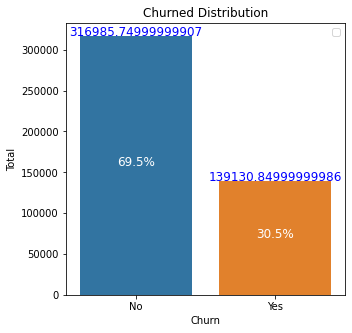

In [231]:
telco_monthly_income  = telco_data['MonthlyCharges'].sum()
churn_customer_amount = telco_data.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount["%"] = 0
churn_customer_amount["%"]= churn_customer_amount["MonthlyCharges"].apply(lambda x: round(x/churn_customer_amount['MonthlyCharges'].sum(), 3))
churn_customer_amount.columns=['Total', '%']
print('The amount of MothlyChages : ',telco_monthly_income)
display(churn_customer_amount)
plot(churn_customer_amount)
#churn_customer_amount['%'].plot(kind='bar')


For the past month, customers who have churned have caused a total loss of $ 139,130.85, which represents 30% of the company's monthly income

In [232]:
depedency("gender")

P_value = 0.48657873605618596. The target variable Churn  and gender  are independent with a significance level of 95%.
Between churn and gender, the cramer's V is 0.006. The relationship is null or very weak.


### <i>How big is churn compared to the existing customer base?

,Total,%
No,5174,0.73463
Yes,1869,0.26537


No handles with labels found to put in legend.
No handles with labels found to put in legend.


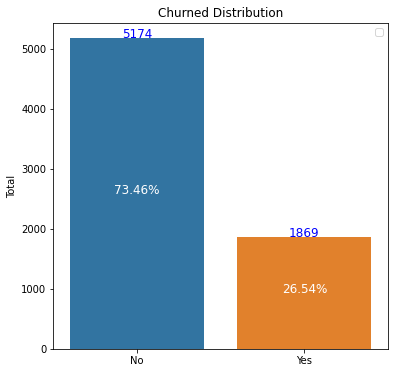

In [233]:
#Let see the rate of Churned customer 
churn_count         = telco_data['Churn'].value_counts().to_frame()
churn_count.columns =['Total']
churn_rate          = telco_data['Churn'].value_counts(normalize=True).to_frame()
churn_rate.columns  =['%']
churn_data          =pd.concat([churn_count,churn_rate],axis=1)
display(churn_data)

plt.figure(figsize=(6,6))
bar =sns.barplot(data=churn_data,x=churn_data.index,y="Total")
i = 0
for tot,perc in zip(churn_data['Total'],churn_data['%']):
        bar.text(i,
                tot/2,
                str(np.round(perc*100,2))+ "%",
                fontdict=dict(color='White',fontsize=12,horizontalalignment="center"))
        bar.text(i,
                tot+10,
                str(tot),
                fontdict=dict(color='blue',fontsize=12,horizontalalignment="center"))

        i+=1
        plt.title("Churned Distribution")
        plt.legend()

<i> Compared to the existing customer base the churned customer represent 26.54 % of the population
<p>Total number of customers who churned is 1869 while the number of remaining customer 5174 which represent 73.5% of the population.

## Explain churn by the below categories. Are there any factors that combine to be especially impactful?



In [234]:
Demographic_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
phoneservices   = ['PhoneService', 'MultipleLines']
internetservices = [ 'InternetService','OnlineBackup','TechSupport']
securityservices = [ 'DeviceProtection', 'OnlineSecurity']
streamingservices= ['StreamingTV', 'StreamingMovies']
billinginfos = ['Contract', 'PaperlessBilling','PaymentMethod']
charges=[ 'MonthlyCharges', 'TotalCharges']

# <i>Analysis Of Customer by Demographic Informations

## <i>Churned Customer by Gender

No handles with labels found to put in legend.


,Total,%
gender,,
Female,939,0.502
Male,930,0.498


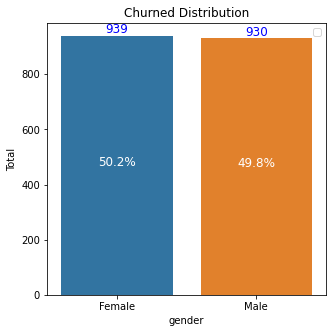

In [235]:
#Pivot Table to visualize Churned Customer group by Gender
table(data=telco_data,column='Churn',index='gender',value='customerID', aggf='count')

### <i>Observations

- The total number of Female customer who churn is 939, which represents 50.2% of the population.
- The total number of Male customer who churn is 930, which represents 49.8% of the population.

In [236]:
depedency('gender')

P_value = 0.48657873605618596. The target variable Churn  and gender  are independent with a significance level of 95%.
Between churn and gender, the cramer's V is 0.006. The relationship is null or very weak.


## <i>Churned Customer by Age_Range(SeniorCitizen)

No handles with labels found to put in legend.


,Total,%
SeniorCitizen,,
No,1393,0.745
Yes,476,0.255


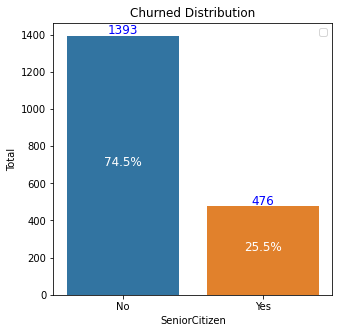

In [237]:
table(data=telco_data,column='Churn',index='SeniorCitizen',value='customerID', aggf='count')

### <i>Observations

- The total number of Young customer who churned is 1393, which represents 74.5% of the population.
- The total number of Senior customer who churned is 476, which represents 25.5% of the population.

In [238]:
depedency('SeniorCitizen')

P_value = 1.510066805092378e-36. The target variable Churn  and SeniorCitizen  are not independent with a significance level of 95%.
Between churn and SeniorCitizen, the cramer's V is 0.107. The relationship is weak.


## <i>Churned Customer who (do or do not) have a Partner

No handles with labels found to put in legend.


,Total,%
Partner,,
No,1200,0.642
Yes,669,0.358


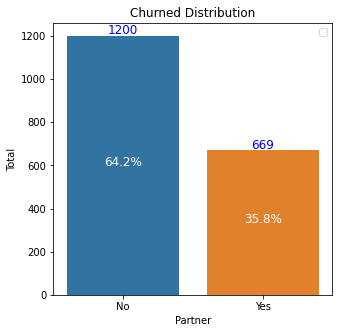

In [239]:
table(data=telco_data,column='Churn',index='Partner',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't have a partner and churned are 1200, which represents 64.2% of the population.
- The total number of Customer who do have a partner and churned are 669, which represents 35.8% of the population.

In [240]:
depedency('Partner')

P_value = 2.1399113440759935e-36. The target variable Churn  and Partner  are not independent with a significance level of 95%.
Between churn and Partner, the cramer's V is 0.106. The relationship is weak.


## <i>Churned Customer who (do or do not) have Dependents

No handles with labels found to put in legend.


,Total,%
Dependents,,
No,1543,0.826
Yes,326,0.174


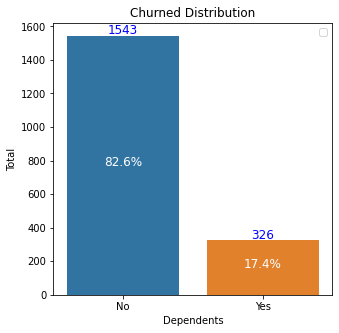

In [241]:
table(data=telco_data,column='Churn',index='Dependents',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't have Dependents and churned are 1543, which represents 82.6% of the population.
- The total number of Customer who do have Dependents and churned are 326, which represents 17.4% of the population.

In [242]:
depedency("Dependents")

P_value = 4.9249216612154196e-43. The target variable Churn  and Dependents  are not independent with a significance level of 95%.
Between churn and Dependents, the cramer's V is 0.116. The relationship is weak.


In [243]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_demographic=telco_data[telco_data['Churn']=='Yes'].pivot_table(columns='Churn',index= Demographic_var[1:], values='customerID', aggfunc='count')
churn_demographic["%"] = churn_demographic["Yes"].apply(lambda x: x/telco_data[telco_data['Churn']=='Yes'].shape[0])
churn_demographic

Churn                             Yes         %
SeniorCitizen Partner Dependents               
No            No      No          847  0.453184
                      Yes          75  0.040128
              Yes     No          242  0.129481
                      Yes         229  0.122525
Yes           No      No          276  0.147673
                      Yes           2  0.001070
              Yes     No          178  0.095238
                      Yes          20  0.010701

## <i>Final Observations for Demographic Variables</i>
- Using the chi-square test on the demographic variables, we were able to identify the variables that affect the level of churn, namely: SeniorCitizen, Partner, and Dependents.
- Combining these three variables, we see that <b>young clients</b> with <b>single status</b> and <b>no dependents</b> represent 45.31% of the churned customer with a total of 847.

# <i>Analysis Of Customer by Services Used 

## <i>Churned Customer By Phone Service

No handles with labels found to put in legend.


,Total,%
PhoneService,,
No,170,0.091
Yes,1699,0.909


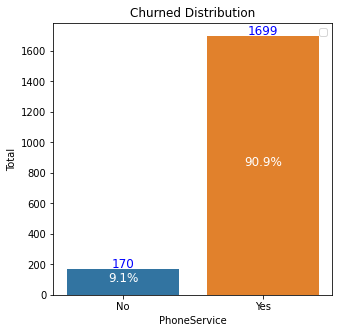

In [244]:
table(data=telco_data,column='Churn',index='PhoneService',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use PhoneService and churned are 170, which represents 9.1% of the churned population.
- The total number of Customer who use PhoneService and churned are 1699, which represents 90.9% of the churned population.

In [245]:
depedency("PhoneService")

P_value = 0.3387825358066928. The target variable Churn  and PhoneService  are independent with a significance level of 95%.
Between churn and PhoneService, the cramer's V is 0.008. The relationship is null or very weak.


## <i>Churned Customer By MultipleLines

No handles with labels found to put in legend.


,Total,%
MultipleLines,,
No,849,0.454
No phone service,170,0.091
Yes,850,0.455


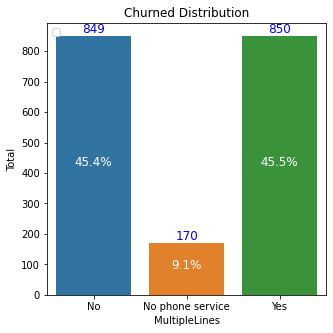

In [246]:
table(data=telco_data,column='Churn',index='MultipleLines',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use MultipleLines and churned are 849, which represents 45.4% of the churned population.
- The total number of Customer who use MultipleLines and churned are 850, which represents 45.5% of the churned population.

In [247]:
depedency("MultipleLines")

P_value = 0.0034643829548773. The target variable Churn  and MultipleLines  are not independent with a significance level of 95%.
Between churn and MultipleLines, the cramer's V is 0.028. The relationship is null or very weak.


In [248]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_phoneservice=telco_data[telco_data['Churn']=='Yes'].pivot_table(index='MultipleLines',columns='Churn', values='customerID', aggfunc='count')
churn_phoneservice["%"] = churn_phoneservice["Yes"].apply(lambda x: x/telco_data[telco_data['Churn']=='Yes'].shape[0])
churn_phoneservice

Churn,Yes,%
MultipleLines,,
No,849,0.454254
No phone service,170,0.090958
Yes,850,0.454789


## <i>Final Observations for Phone Services Variables</i>
- Using the chi-square test on the variable related to phone services, we were able to identify that Customers who are using MultipleLines service are more likely to tend.
- The churned Customer who are using MultipleLines Service represents 45.47% of the total of Churned Customer with a total of 850.

## <i>Churned Customer By InternetService

No handles with labels found to put in legend.


,Total,%
InternetService,,
DSL,459,0.246
Fiber optic,1297,0.694
No,113,0.060


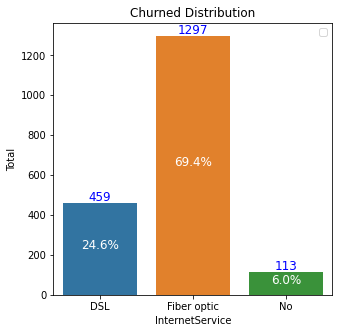

In [249]:
table(data=telco_data,column='Churn',index='InternetService',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use InternetService and churned are 113, which represents 6% of the churned population.
- The total number of Customer who use Fiber Optic and churned are 1297, which represents 69.4% of the churned population.
- The total number of Customer who use DSL(Digital Subscriber Line) and churned are 459, which represents 24.6% of the churned population.

In [250]:
depedency("InternetService")

P_value = 9.571788222840544e-160. The target variable Churn  and InternetService  are not independent with a significance level of 95%.
Between churn and InternetService, the cramer's V is 0.228. The relationship is moderate.


## <i>Churned Customer By OnlineSecurity

No handles with labels found to put in legend.


,Total,%
OnlineSecurity,,
No,1461,0.782
No internet service,113,0.060
Yes,295,0.158


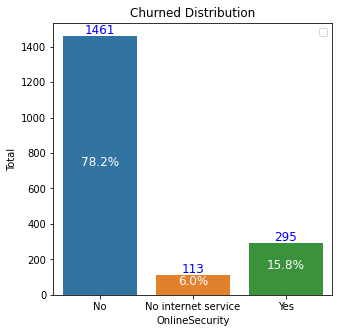

In [251]:
table(data=telco_data,column='Churn',index='OnlineSecurity',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use OnlineSecurity and churned are 1461, which represents 78.2% of the churned population.
- The total number of Customer who use OnlineSecurity and churned are 295, which represents 15.8% of the churned population.


In [252]:
depedency("OnlineSecurity")

P_value = 2.661149635176552e-185. The target variable Churn  and OnlineSecurity  are not independent with a significance level of 95%.
Between churn and OnlineSecurity, the cramer's V is 0.246. The relationship is moderate.


## <i>Churned Customer By OnlineBackup

No handles with labels found to put in legend.


,Total,%
OnlineBackup,,
No,1233,0.66
No internet service,113,0.06
Yes,523,0.28


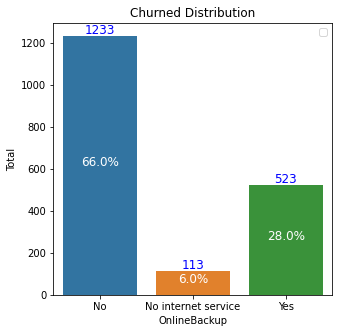

In [253]:
table(data=telco_data,column='Churn',index='OnlineBackup',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use Online Backup and churned are 1233, which represents 66% of the churned population.
- The total number of Customer who use Online Backup and churned are 523, which represents 28% of the churned population.

In [254]:
depedency("OnlineBackup")

P_value = 2.0797592160864276e-131. The target variable Churn  and OnlineBackup  are not independent with a significance level of 95%.
Between churn and OnlineBackup, the cramer's V is 0.207. The relationship is moderate.


In [255]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_internetservices=telco_data[telco_data['Churn']=='Yes'].pivot_table(index=['InternetService','OnlineSecurity','OnlineBackup'],columns='Churn', values='customerID', aggfunc='count')
churn_internetservices["%"] = churn_internetservices["Yes"].apply(lambda x: x/telco_data[telco_data['Churn']=='Yes'].shape[0])
churn_internetservices

Churn                                                    Yes         %
InternetService OnlineSecurity      OnlineBackup                      
DSL             No                  No                   274  0.146602
                                    Yes                   73  0.039058
                Yes                 No                    69  0.036918
                                    Yes                   43  0.023007
Fiber optic     No                  No                   783  0.418941
                                    Yes                  331  0.177100
                Yes                 No                   107  0.057250
                                    Yes                   76  0.040663
No              No internet service No internet service  113  0.060460

## <i>Observations</i>
- Using the chi-square test on these variables (InternetService,OnlineBackup,OnlineSecurity), we were able to justify that these variables affect the level of churn.
- Churn customer who are using Fiber Optic whithout using OnlineBackup or OnlineSecurity are more likely to churn, they represents 41.89% of the churned population with a total of 783.

## <i>Churned Customer By DeviceProtection

No handles with labels found to put in legend.


,Total,%
DeviceProtection,,
No,1211,0.648
No internet service,113,0.060
Yes,545,0.292


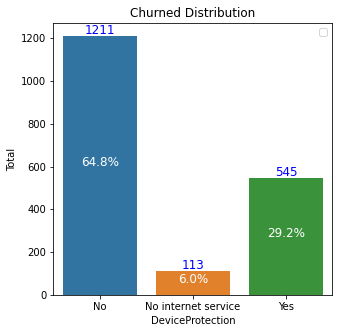

In [256]:
table(data=telco_data,column='Churn',index='DeviceProtection',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use Device Protection and churned are 1211, which represents 64.8% of the population.
- The total number of Customer who use Device Protection and churned are 545, which represents 29.2% of the population.

In [257]:
depedency("DeviceProtection")

P_value = 5.505219496457244e-122. The target variable Churn  and DeviceProtection  are not independent with a significance level of 95%.
Between churn and DeviceProtection, the cramer's V is 0.199. The relationship is weak.


## <i>Churned Customer By TechSupport

No handles with labels found to put in legend.


,Total,%
TechSupport,,
No,1446,0.774
No internet service,113,0.060
Yes,310,0.166


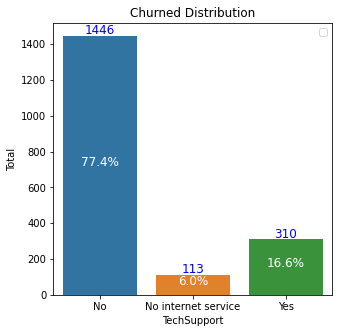

In [258]:
table(data=telco_data,column='Churn',index='TechSupport',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use TechSupport and churned are 1446, which represents 77.4% of the population.
- The total number of Customer who use TechSupport and churned are 310, which represents 16.6% of the population.

In [259]:
depedency("TechSupport")

P_value = 1.4430840279998987e-180. The target variable Churn  and TechSupport  are not independent with a significance level of 95%.
Between churn and TechSupport, the cramer's V is 0.242. The relationship is moderate.


In [260]:
churn_inter_deviceprotec=telco_data[telco_data['Churn']=='Yes'].pivot_table(index=['TechSupport','DeviceProtection'],columns='Churn', values='customerID', aggfunc='count')
churn_inter_deviceprotec["%"] = churn_inter_deviceprotec["Yes"].apply(lambda x: x/telco_data[telco_data['Churn']=='Yes'].shape[0])
churn_inter_deviceprotec

Churn                                     Yes         %
TechSupport         DeviceProtection                   
No                  No                   1048  0.560728
                    Yes                   398  0.212948
No internet service No internet service   113  0.060460
Yes                 No                    163  0.087212
                    Yes                   147  0.078652

## <i>Churned Customer By StreamingTV

No handles with labels found to put in legend.


,Total,%
StreamingTV,,
No,942,0.504
No internet service,113,0.060
Yes,814,0.436


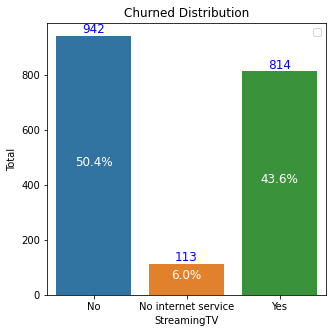

In [261]:
table(data=telco_data,column='Churn',index='StreamingTV',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use StreamingTV and churned are 942, which represents 13.4% of the population.
- The total number of Customer who use StreamingTV and churned are 814, which represents 11.6% of the population.

In [262]:
depedency("StreamingTV")

P_value = 5.528994485739183e-82. The target variable Churn  and StreamingTV  are not independent with a significance level of 95%.
Between churn and StreamingTV, the cramer's V is 0.163. The relationship is weak.


## <i>Churned Customer By StreamingMovies

No handles with labels found to put in legend.


,Total,%
StreamingMovies,,
No,938,0.502
No internet service,113,0.060
Yes,818,0.438


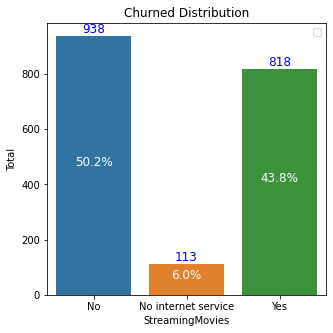

In [263]:
table(data=telco_data,column='Churn',index='StreamingMovies',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use StreamingMovies and churned are 938, which represents 13.3% of the population.
- The total number of Customer who use StreamingMovies and churned are 818, which represents 11.6% of the population.

In [264]:
depedency("StreamingMovies")

P_value = 2.667756755723681e-82. The target variable Churn  and StreamingMovies  are not independent with a significance level of 95%.
Between churn and StreamingMovies, the cramer's V is 0.163. The relationship is weak.


In [265]:
tt=telco_data[telco_data['Churn']=='Yes'].pivot_table(index=streamingservices,columns='Churn', values='customerID', aggfunc='count')
tt

Churn                                    Yes
StreamingTV         StreamingMovies         
No                  No                   695
                    Yes                  247
No internet service No internet service  113
Yes                 No                   243
                    Yes                  571

# <i>Analysis Of Customer by Billing Information
## <i>Churned Customer By Contract

No handles with labels found to put in legend.


,Total,%
Contract,,
Month-to-month,1655,0.886
One year,166,0.089
Two year,48,0.026


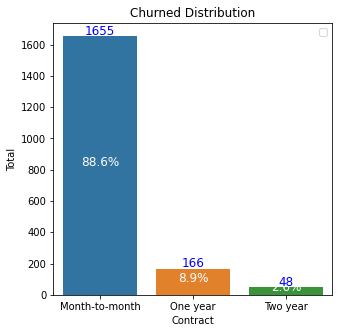

In [266]:
table(data=telco_data,column='Churn',index='Contract',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who use Month-to-month Contract and churned are 1655, which represents 23.5% of the population.
- The total number of Customer who use One year	Contract and churned are 166, which represents 2.4% of the population.
- The total number of Customer who use Two year	Contract and churned are 48, which represents 0.7% of the population.

In [267]:
depedency('Contract')

P_value = 5.863038300673391e-258. The target variable Churn  and Contract  are not independent with a significance level of 95%.
Between churn and Contract, the cramer's V is 0.29. The relationship is moderate.


## <i>Churned Customer By PaperlessBilling

No handles with labels found to put in legend.


,Total,%
PaperlessBilling,,
No,469,0.251
Yes,1400,0.749


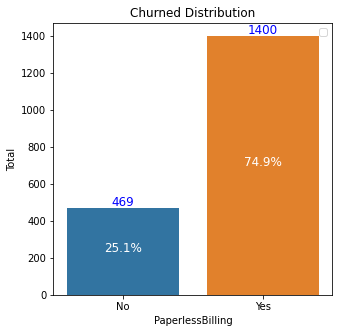

In [268]:
table(data=telco_data,column='Churn',index='PaperlessBilling',value='customerID', aggf='count')

### <i>Observations

- The total number of Customer who don't use PaperlessBilling and churned are 469, which represents 6.7% of the population.
- The total number of Customer who use PaperlessBilling and churned are 1400, which represents 19.9% of the population.

In [269]:
depedency('PaperlessBilling')

P_value = 4.073354668665985e-58. The target variable Churn  and PaperlessBilling  are not independent with a significance level of 95%.
Between churn and PaperlessBilling, the cramer's V is 0.136. The relationship is weak.


## <i>Churned Customer By PaymentMethod

No handles with labels found to put in legend.


,Total,%
PaymentMethod,,
Bank transfer (automatic),258,0.138
Credit card (automatic),232,0.124
Electronic check,1071,0.573
Mailed check,308,0.165


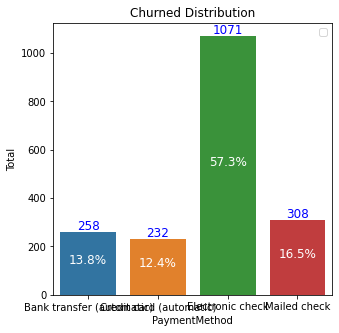

In [270]:
table(data=telco_data,column='Churn',index='PaymentMethod',value='customerID', aggf='count')

### <i>Observations

 - The total number of Customer who use Bank transfer as PaymentMethod and churned are 258, which represents 3.7% of the population.
 - The total number of Customer who use Credit card as PaymentMethod and churned are 232, which represents 3.3% of the population.
 - The total number of Customer who use Electronic check as PaymentMethod and churned are 1071, which represents 15.2% of the population.
 - The total number of Customer who use Mailed check as PaymentMethod and churned are 308, which represents 4.4% of the population.

In [271]:
depedency('PaymentMethod')

P_value = 3.6823546520097993e-140. The target variable Churn  and PaymentMethod  are not independent with a significance level of 95%.
Between churn and PaymentMethod, the cramer's V is 0.215. The relationship is moderate.


## <i>Observations</i>
- Using the chi-square test on the variables related to billing information, we were able to justify that they affect the level of churn.

In [272]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_billinginfo = telco_data[telco_data['Churn']=='Yes'].pivot_table(index=billinginfos,columns='Churn', values='customerID', aggfunc='count')
churn_billinginfo["%"] = churn_billinginfo["Yes"].apply(lambda x: x/telco_data[telco_data['Churn']=='Yes'].shape[0])
churn_billinginfo

Churn                                                      Yes         %
Contract       PaperlessBilling PaymentMethod                           
Month-to-month No               Bank transfer (automatic)   55  0.029428
                                Credit card (automatic)     45  0.024077
                                Electronic check           188  0.100589
                                Mailed check               118  0.063135
               Yes              Bank transfer (automatic)  146  0.078117
                                Credit card (automatic)    133  0.071161
                                Electronic check           806  0.431247
                                Mailed check               164  0.087747
One year       No               Bank transfer (automatic)   11  0.005886
                                Credit card (automatic)     13  0.006956
                                Electronic check            14  0.007491
                                Mailed check                10  0.005350
               Yes              Bank transfer (automatic)   27  0.014446
                                Credit card (automatic)     28  0.014981
                                Electronic check            50  0.026752
                                Mailed check                13  0.006956
Two year       No               Bank transfer (automatic)    6  0.003210
                                Credit card (automatic)      6  0.003210
                                Electronic check             2  0.001070
                                Mailed check                 1  0.000535
               Yes              Bank transfer (automatic)   13  0.006956
                                Credit card (automatic)      7  0.003745
                                Electronic check            11  0.005886
                                Mailed check                 2  0.001070

##<i>Observations

- Combining these three variables, we see that Customer who are using <b>Month-to-month	Contract</b> with <b>PaperlessBilling</b> and <b>Electronic Check PaymentMethod</b> represent 43.12% of the churned customer with a total of 806.

In [273]:
churn_customer_totamount = telco_data.groupby(by=['Churn']).TotalCharges.sum().to_frame()
churn_customer_totamount

,TotalCharges
Churn,
No,13193697.4
Yes,2862926.9


In [274]:
churn_customer_amount = telco_data.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount

,MonthlyCharges
Churn,
No,316985.75
Yes,139130.85


In [275]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

## <i>Churned Customer Tenure Variation

In [276]:
churn_tenure_count  = telco_data.pivot_table(index="tenure_group",columns="Churn",values ="customerID",aggfunc="count", margins=True)
churn_tenure_count 

Churn,No,Yes,All
tenure_group,,,
0 - 12,1138,1037,2175
13 - 24,730,294,1024
25 - 36,652,180,832
37 - 48,617,145,762
49 - 60,712,120,832
61 - 72,1314,93,1407
All,5163,1869,7032


Text(0, 0.5, 'Total Charges')

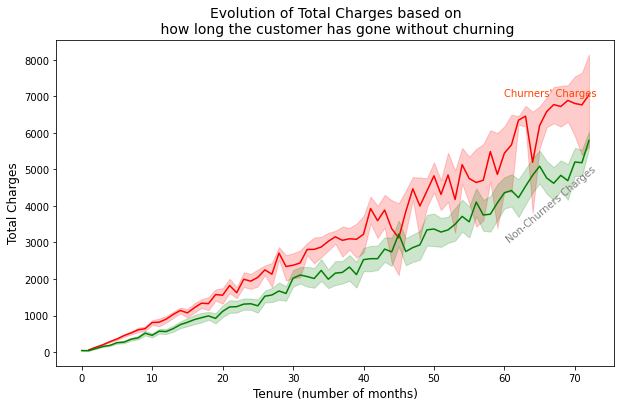

In [277]:
ax = plt.figure(figsize=(10,6))
sns.lineplot(y=telco_data.TotalCharges[telco_data.Churn=='Yes'], x=telco_data.tenure[telco_data.Churn=='Yes'], data=telco_data, color='red')
sns.lineplot(x=telco_data.tenure[telco_data.Churn=="No"], y=telco_data.TotalCharges[telco_data.Churn=='No'], data=telco_data, color='green')
plt.text(60, 7000, "Churners' Charges", color='orangered')
plt.text(60, 3000, "Non-Churners Charges", rotation = 40, color='grey')
plt.title('Evolution of Total Charges based on\n how long the customer has gone without churning', size=14)
plt.xlabel('Tenure (number of months)', size=12)
plt.ylabel('Total Charges', size=12)

In [278]:
n = 0
V = 7043*(1-0.26)**n
# on suppose que la proportion de personnes churned restera consante au cours des prochains mois si rien n'est fait.
# soon decide de voir apres combien de mois, l'entreprise restera avec un client
#1 = 7043*(1-0.26)**n
# on a:
#1/7043 = (1-0.26)**n
#d'ou:
n = np.log(1/7043) / np.log(1-0.26)
n

29.42424325284778

In [279]:
#for col in Demographic_var:
telco_data[["gender", "Churn"]].groupby(by="Churn").count()

,gender
Churn,
No,5174
Yes,1869
